In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf

## One Sample Sim

In [2]:
np.random.seed(1234567)

n = 1000

# set true parameters (betas and sd of u)
beta0 = 1
beta1 = 0.5
su = 2

# draw a sample of size n:
x = stats.norm.rvs(4, 1, size=n)
u = stats.norm.rvs(0, su, size=n)
y = beta0 + beta1*x + u
df = pd.DataFrame({'y': y, 'x': x})

# estimate parameters by OLS
reg = smf.ols(formula='y ~ x', data=df)
results = reg.fit()
b = results.params

In [3]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     46.91
Date:                Sun, 05 Dec 2021   Prob (F-statistic):           1.30e-11
Time:                        20:17:02   Log-Likelihood:                -2112.7
No. Observations:                1000   AIC:                             4229.
Df Residuals:                     998   BIC:                             4239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1902      0.270      4.415      0.0

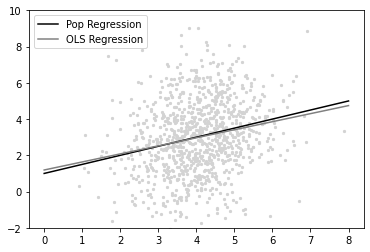

In [4]:
x_range = np.linspace(0, 8, num=100)
plt.ylim([-2, 10])
plt.scatter(x, y, color='lightgray', s=5)
plt.plot(x_range, beta0 + beta1*x_range, color='k', label='Pop Regression')
plt.plot(x_range, b[0] + b[1]* x_range, color='gray', label='OLS Regression')
plt.legend()

## Many Samples

In [5]:
np.random.seed(1234567)

# set sample size and number of simulations
n = 1000
r = 10000

# set the true parameters
beta0 = 1
beta1 = 0.5
su = 2

# initialize b0 and b1 to store results later
b0 = np.empty(r)
b1 = np.empty(r)

# draw a sample of x, fixed over replications
x = stats.norm.rvs(4, 1, size=n)

# repeat r times
for i in range(r):
    # draw a sample of y
    u = stats.norm.rvs(0, su, size=n)
    y = beta0 + beta1*x + u
    df = pd.DataFrame({'y': y, 'x': x})

    # estimate and store parameters by OLS
    reg = smf.ols(formula='y ~ x', data=df)
    results = reg.fit()
    b0[i] = results.params['Intercept']
    b1[i] = results.params['x']

# MC estimate of the expected values
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

# MC estimate of the variances
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print('b0_mean', b0_mean)
print('b1_mean', b1_mean)
print('b0_var', b0_var)
print('b1_var', b1_var)


b0_mean 1.00329460319241
b1_mean 0.49936958775965984
b0_var 0.07158103946245628
b1_var 0.004157652196227234


Text(0, 0.5, 'y')

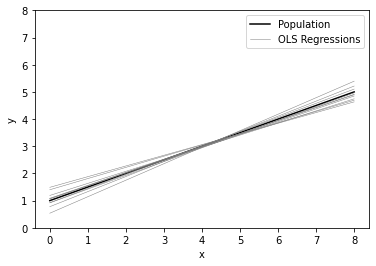

In [6]:
x_range = np.linspace(0, 8, num=100)
plt.ylim([0, 8])

plt.plot(x_range, beta0 + beta1*x_range, color='k', label='Population')
plt.plot(x_range, b0[0] + b1[0]*x_range, color='gray', linewidth=0.5, label='OLS Regressions')
for i in range(1, 10):
    plt.plot(x_range, b0[i] + b1[i]*x_range, color='gray', linewidth=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
